# Лабораторна робота 2
Пшеничного Ніколи, ДО-3


In [14]:
library(psych)
library(ggplot2)
library(moments)
library(gamlss)
library(goftest)
library(goft)
library(qqplotr)
library(car)
library(corrplot)
library(ggstatsplot)
library(qgraph)
library(modelr)

In [3]:
data <- read.csv("/Users/nicol/OneDrive/Документы/Я у мамы программист/R/Lab1/WHR_2023.csv", header = TRUE)

replace_na_with_mean <- function(x) {
  mean_val <- mean(x, na.rm = TRUE)
  x[is.na(x)] <- mean_val
  return(x)
}

# Apply the function to each column
data_imputed <- apply(data[,3:8], 2, replace_na_with_mean)
data_imputed <- as.data.frame(data_imputed)

View(data_imputed)


Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"line 1 appears to contain embedded nulls"
Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"incomplete final line found by readTableHeader on '/Users/nicol/OneDrive/Документы/Я у мамы программист/R/bezrobocie_od_2000_roku.xlsx'"


PK...
<lgl>


In [37]:
options(repr.plot.width=12, repr.plot.height=12)

## 3.1. Зображення двовимірних даних. Діаграма розсіювання

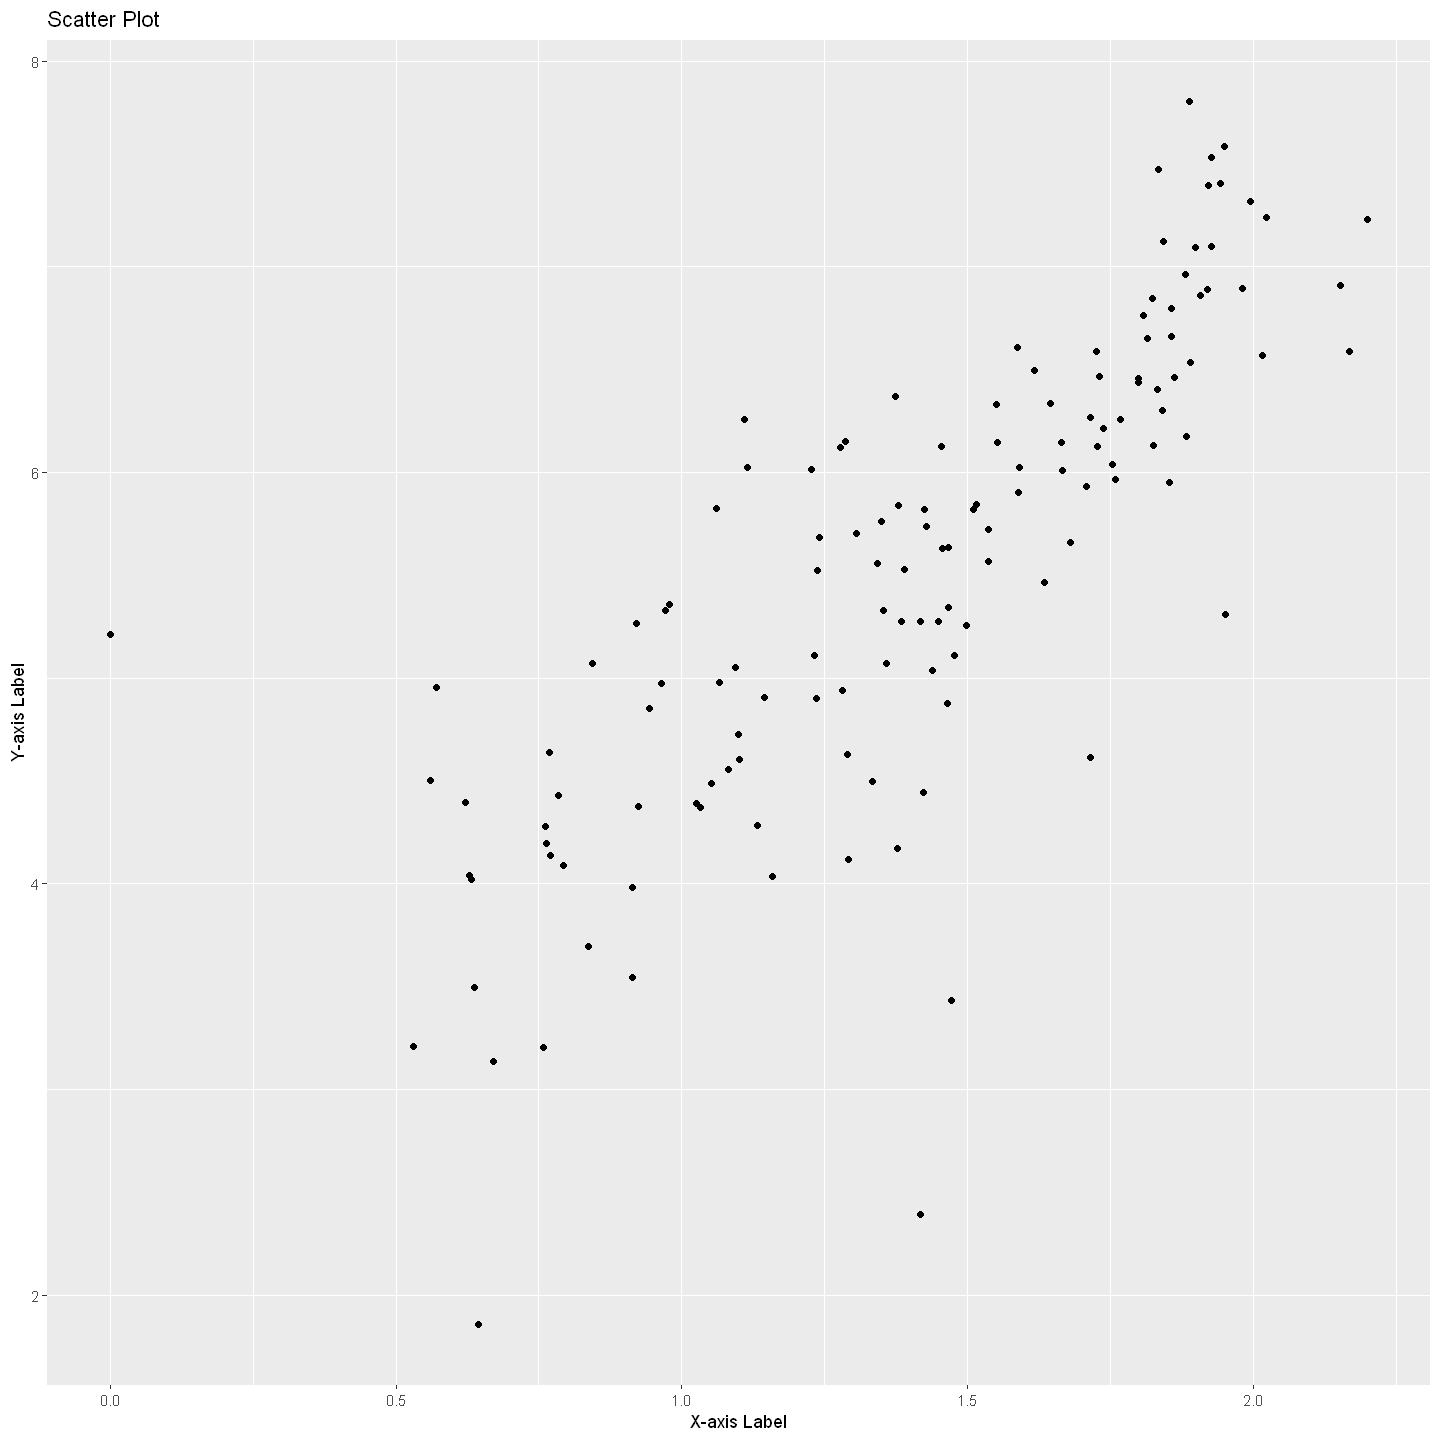

In [38]:
ggplot(data_imputed, aes(x = gdp_per_capita, y = happiness_score)) +
  geom_point() +
  labs(title = "Scatter Plot", x = "X-axis Label", y = "Y-axis Label")

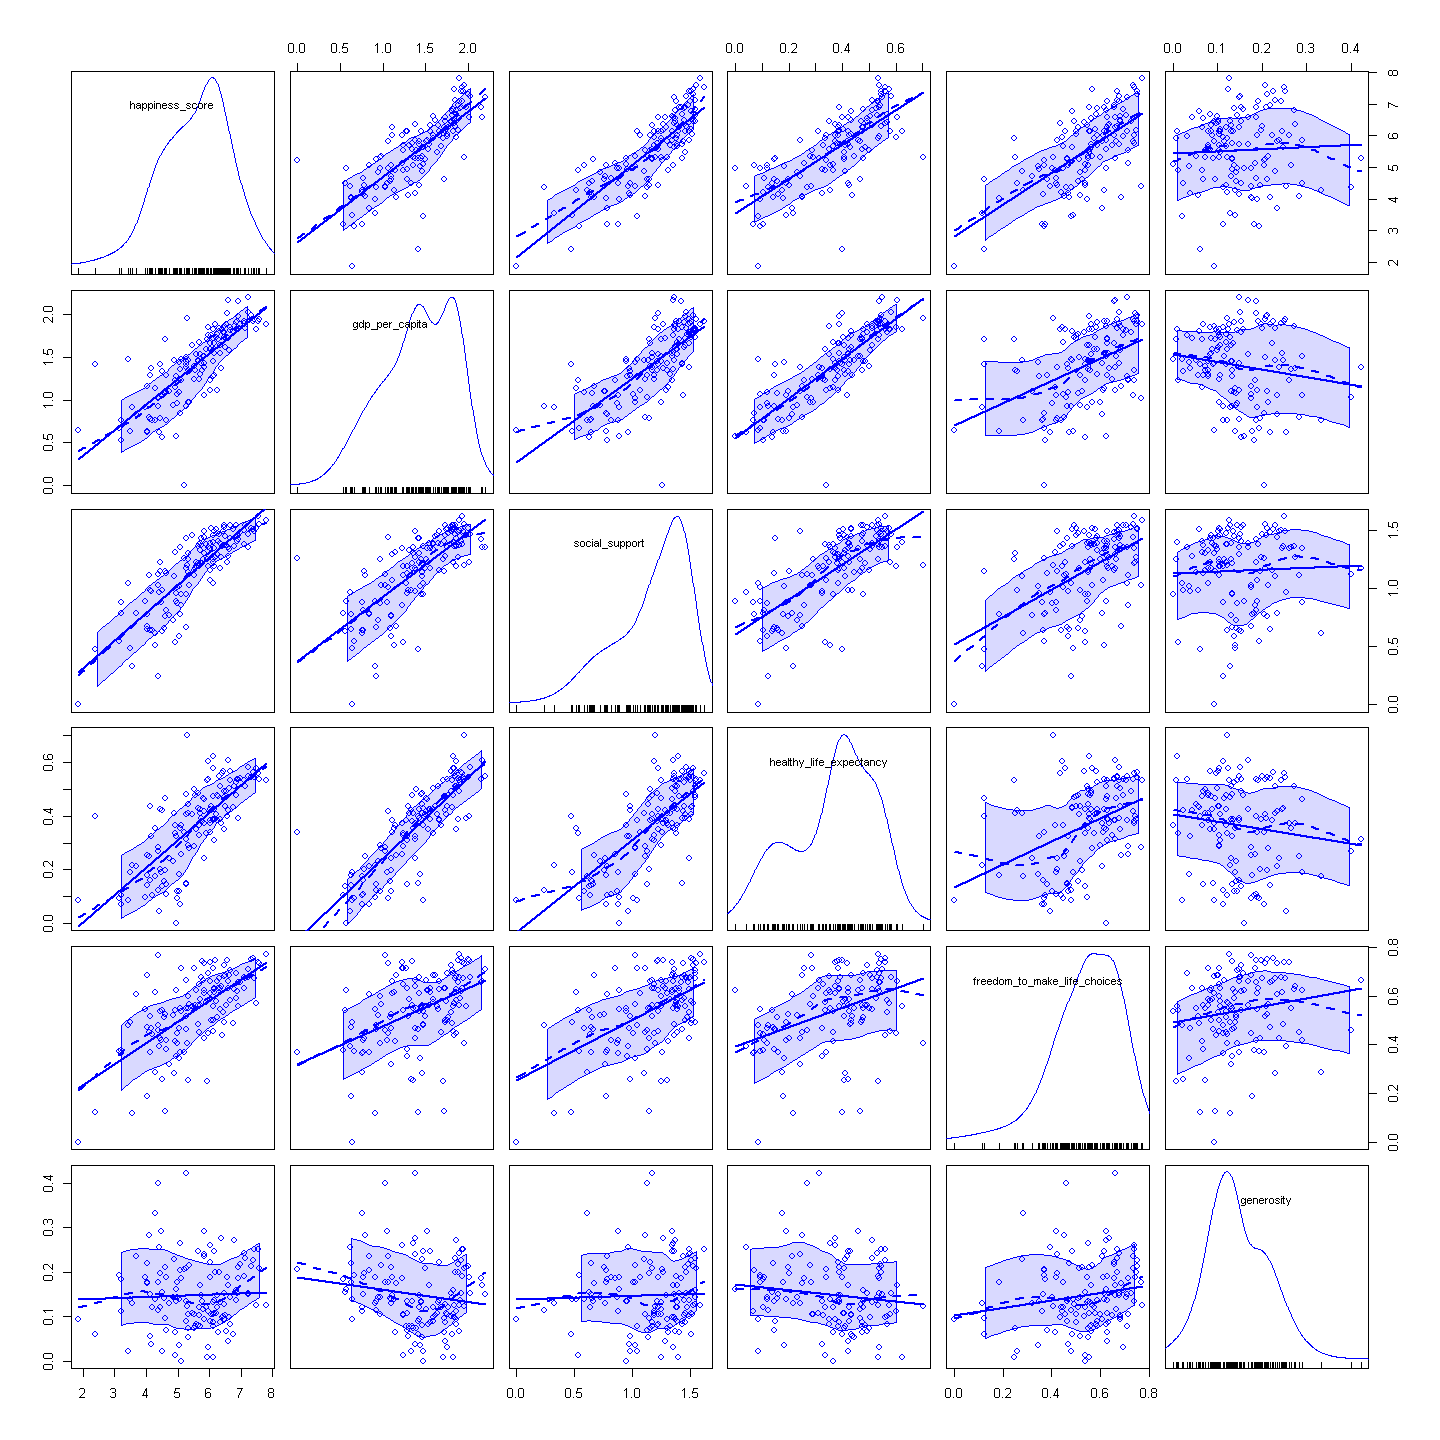

In [39]:
scatterplotMatrix(data_imputed, cex = 1.0)

## 3.2. Коефіцієнти кореляції та кореляційна матриця

#### Кореляційна матриця з коефіцієнтами кореляції Пірсон

In [40]:
cor_matrix<-cor(data_imputed)
cor_matrix

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity
happiness_score,1.00000000,0.7843422,0.83460448,0.7458493,0.6629085,0.04367966
gdp_per_capita,0.78434218,1.0000000,0.73799278,0.8363732,0.4514050,-0.15678038
social_support,0.83460448,0.7379928,1.00000000,0.7247448,0.5418317,0.03573646
healthy_life_expectancy,0.74584932,0.8363732,0.72474477,1.0000000,0.4139068,-0.13491615
freedom_to_make_life_choices,0.66290852,0.4514050,0.54183170,0.4139068,1.0000000,0.16968528
generosity,0.04367966,-0.1567804,0.03573646,-0.1349162,0.1696853,1.00000000


#### Кореляційна матриця з коефіцієнтами кореляції Кендала

In [41]:
cor(data_imputed, method = "kendal")

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity
happiness_score,1.00000000,0.65621477,0.65284425,0.57585254,0.4675411,0.03377075
gdp_per_capita,0.65621477,1.00000000,0.57778261,0.67426534,0.3315958,-0.07066424
social_support,0.65284425,0.57778261,1.00000000,0.52826350,0.3480833,0.03948999
healthy_life_expectancy,0.57585254,0.67426534,0.52826350,1.00000000,0.2925097,-0.08119751
freedom_to_make_life_choices,0.46754106,0.33159577,0.34808327,0.29250970,1.0000000,0.13176879
generosity,0.03377075,-0.07066424,0.03948999,-0.08119751,0.1317688,1.00000000


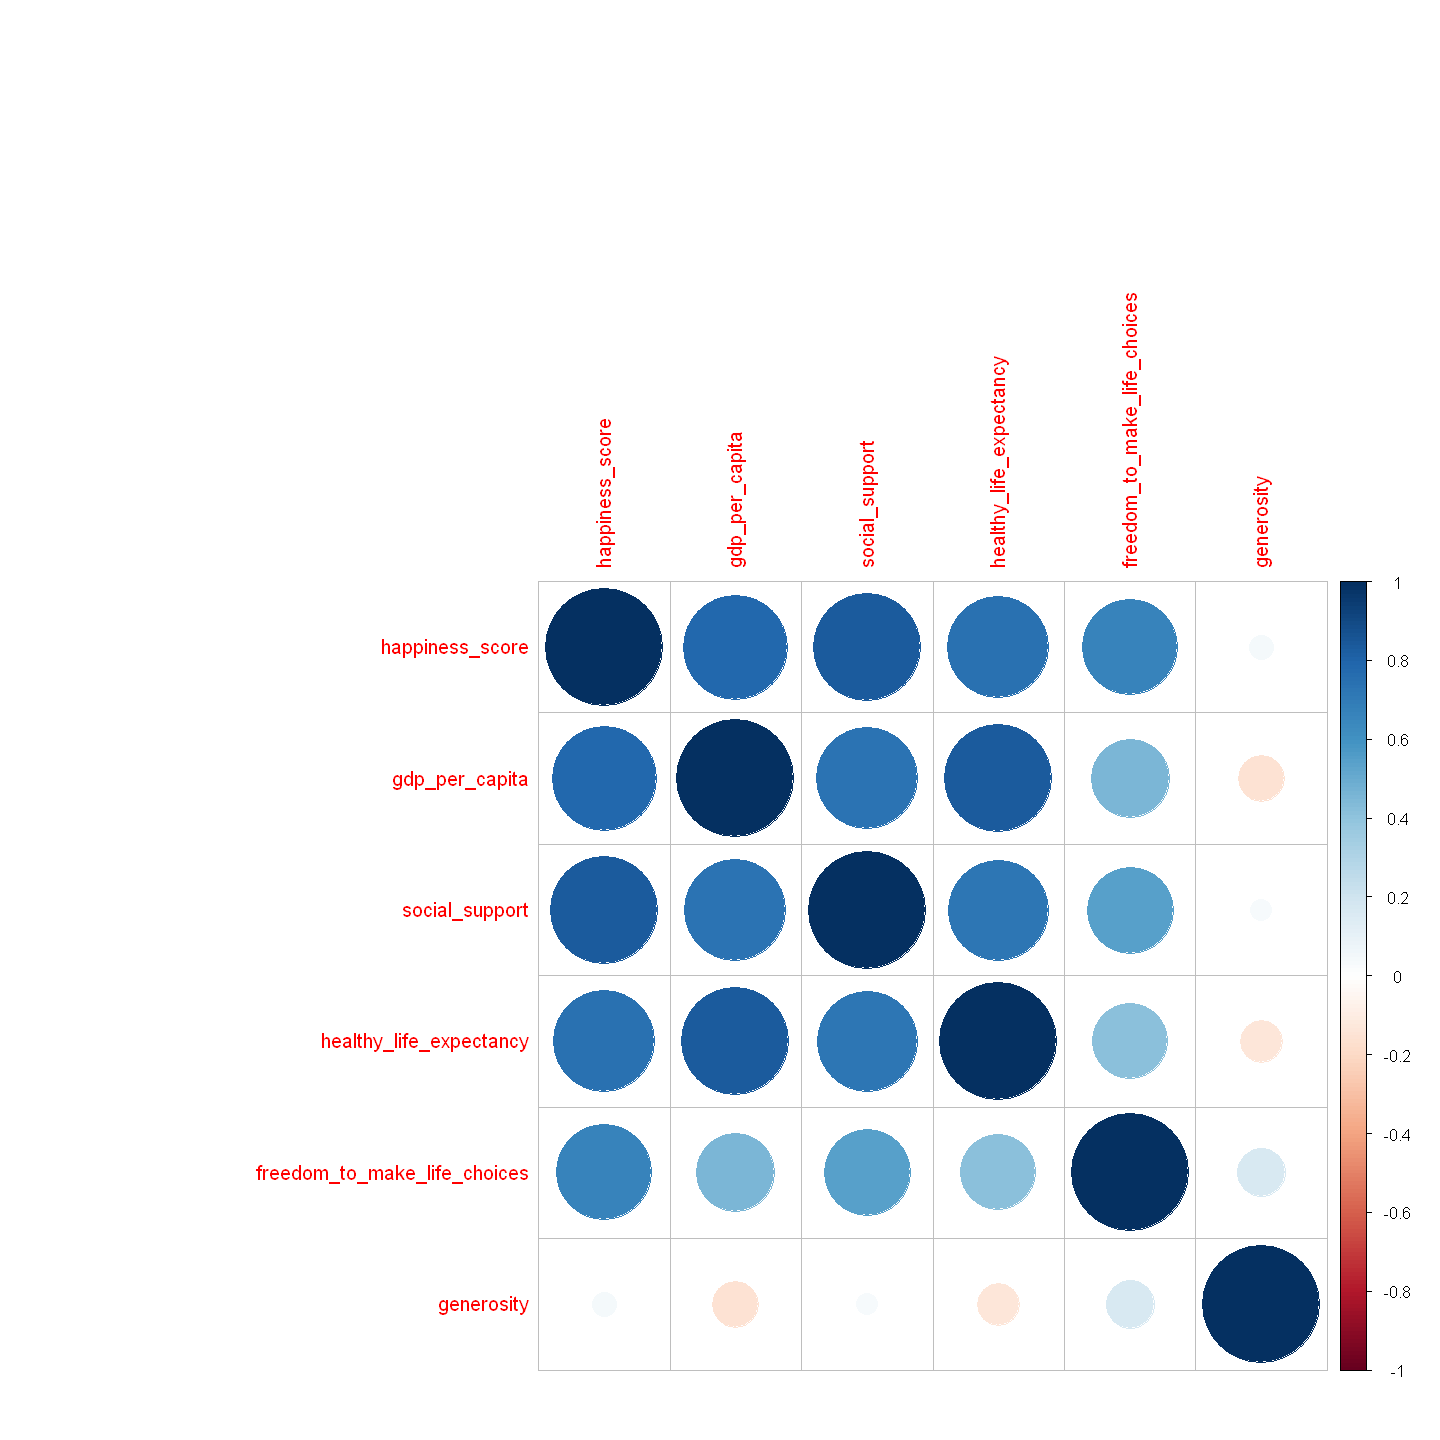

In [42]:
corrplot(cor_matrix)

## 3.3. Візуалізація кореляцій

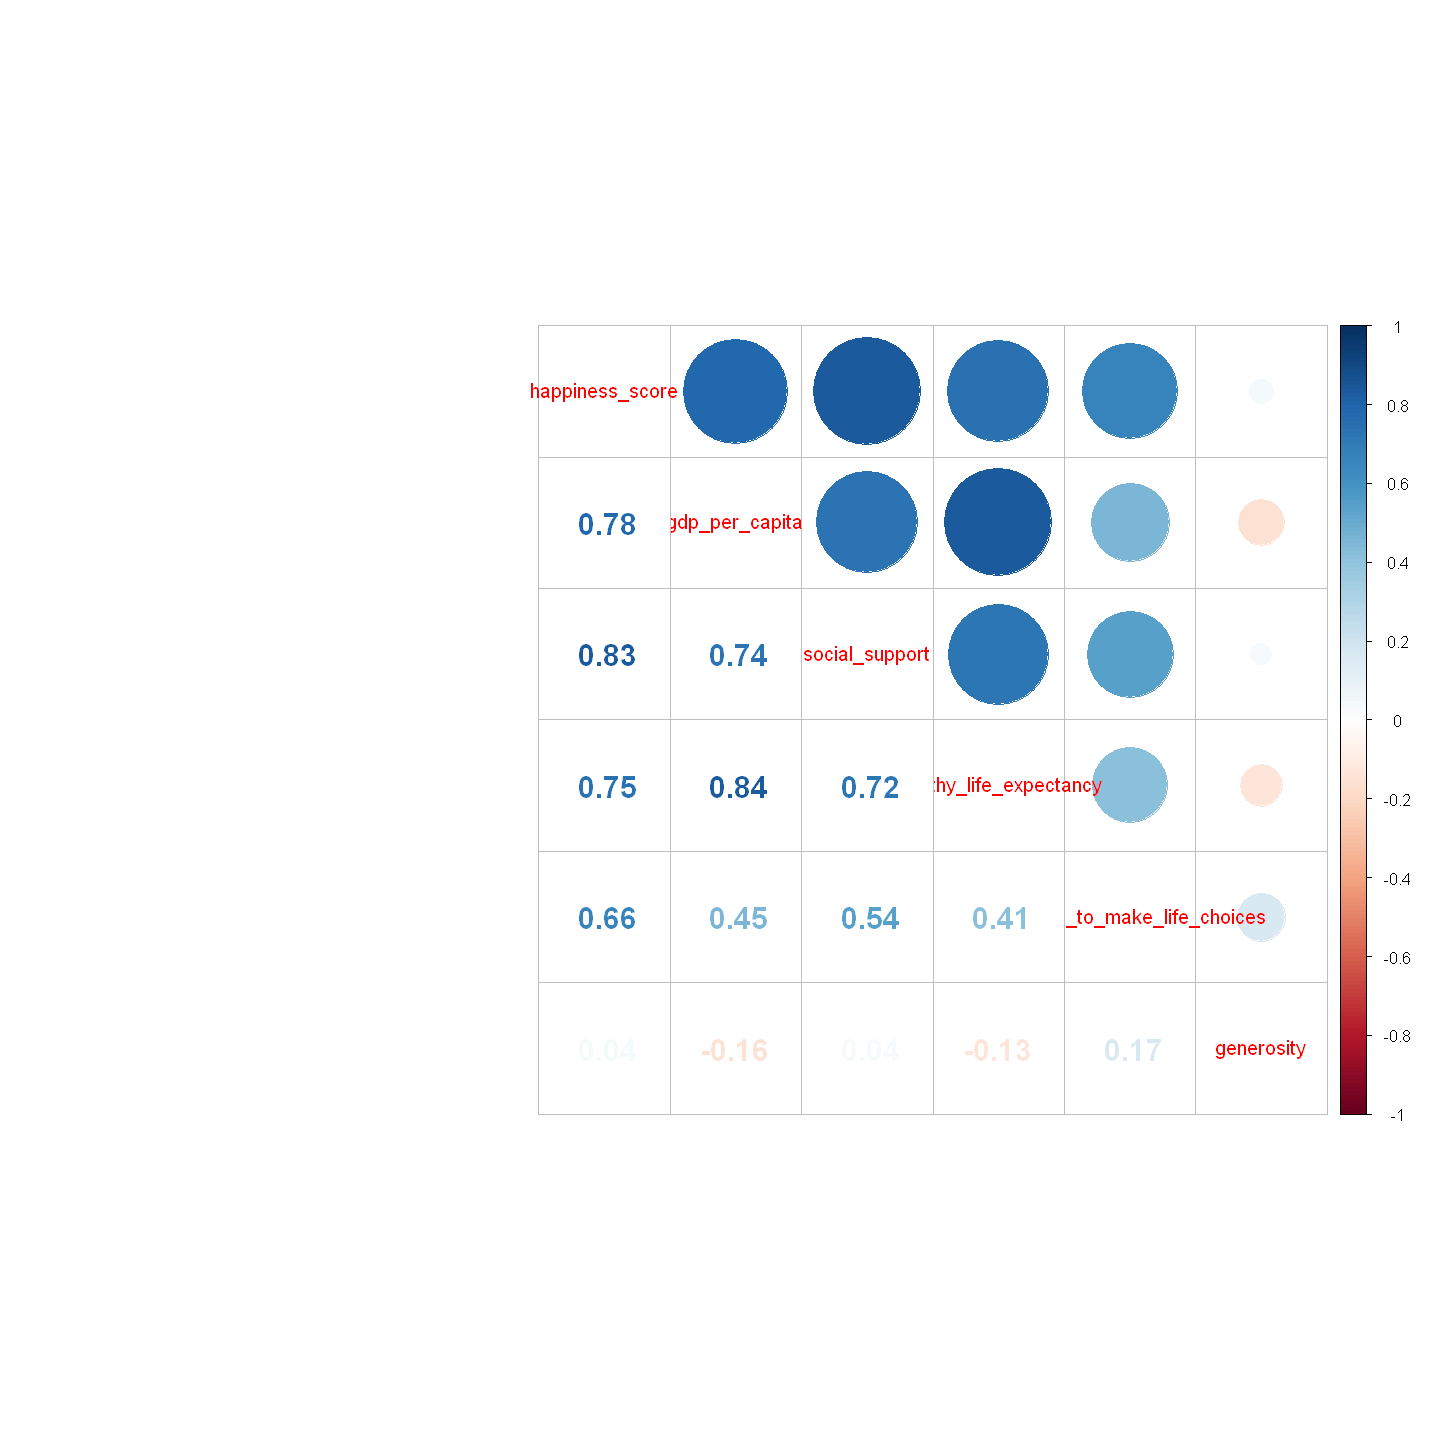

In [43]:
corrplot.mixed(cor_matrix, addgrid.col = T, number.cex=1.5)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


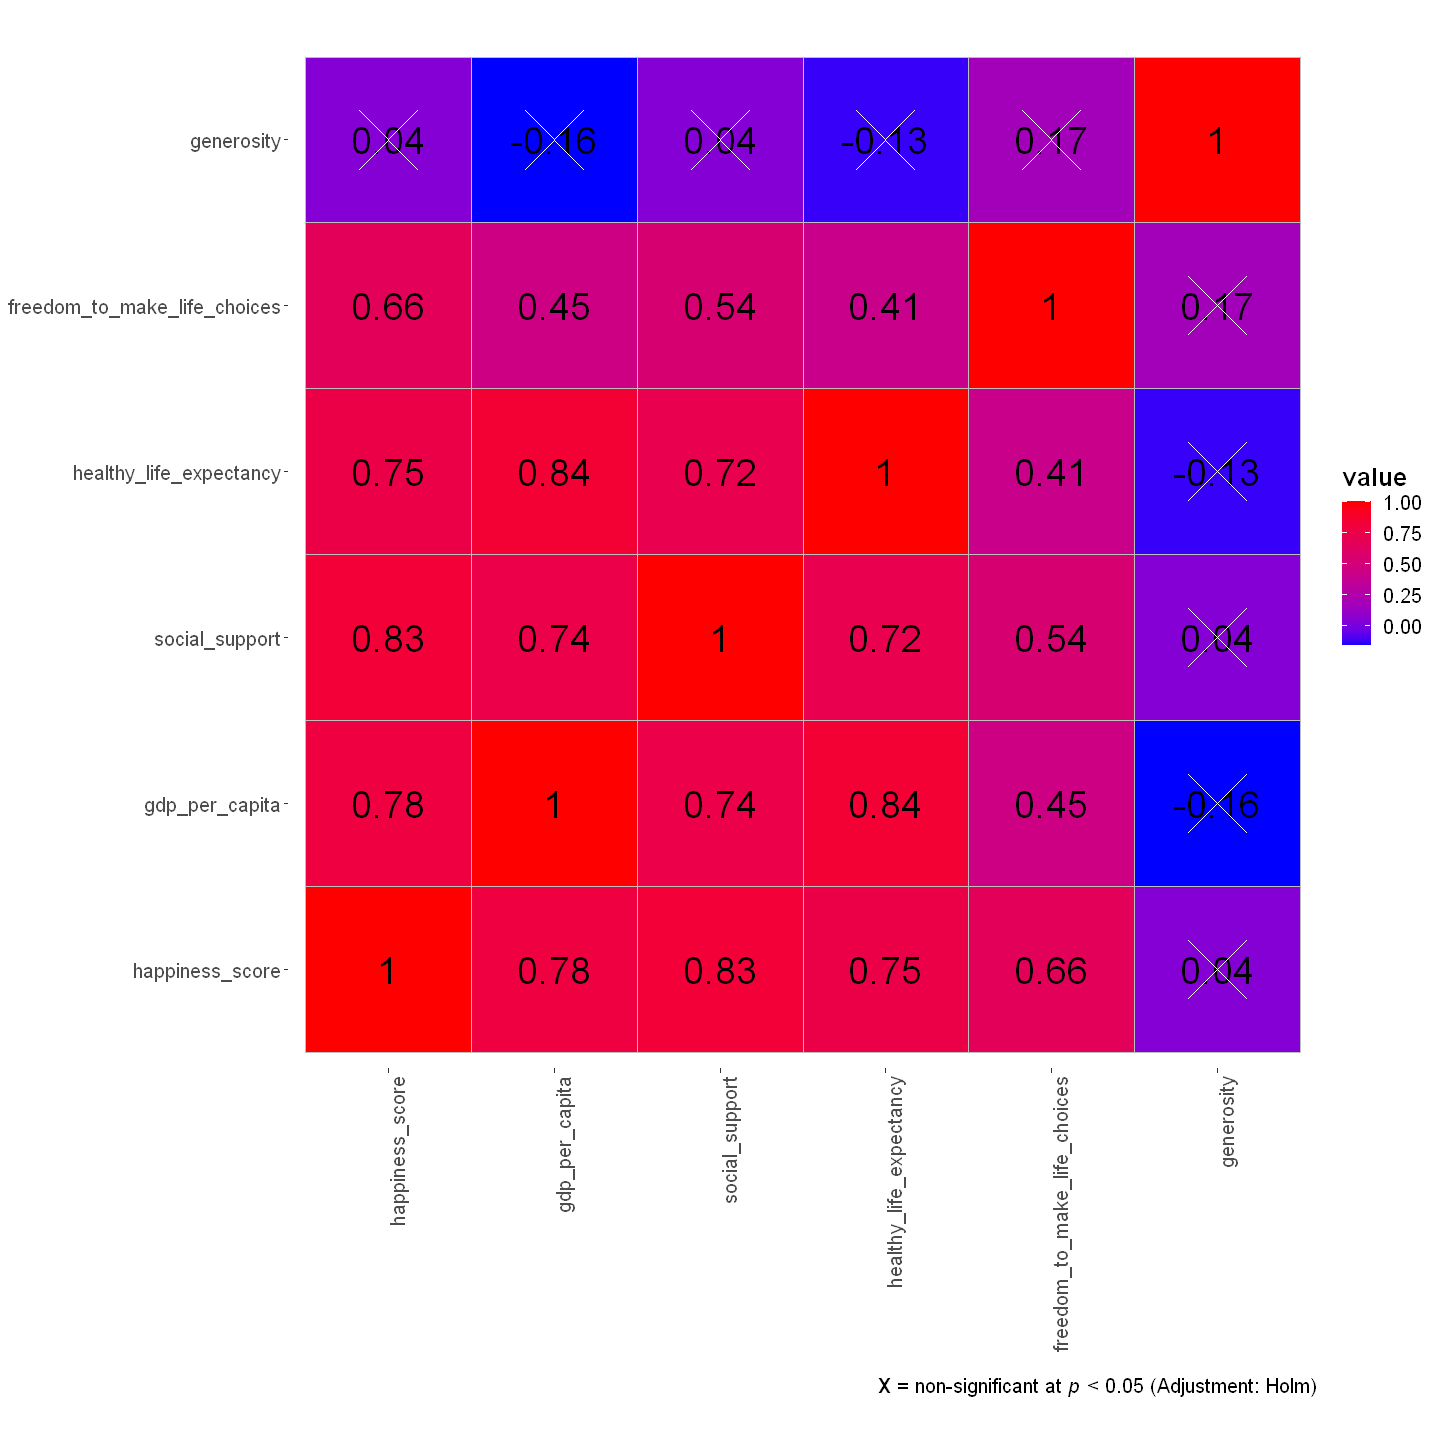

In [44]:
p <- ggcorrmat(data_imputed, matrix.type = "full", ggplot.component = list(theme(text = element_text(size = 15))),   ggcorrplot.args = list(
    lab_col = "black",
    lab_size = 8,
    tl.srt = 90,
    pch.col = "white",
    pch.cex = 16
  ))

p +
  scale_fill_gradient(low = "blue", high = "red")

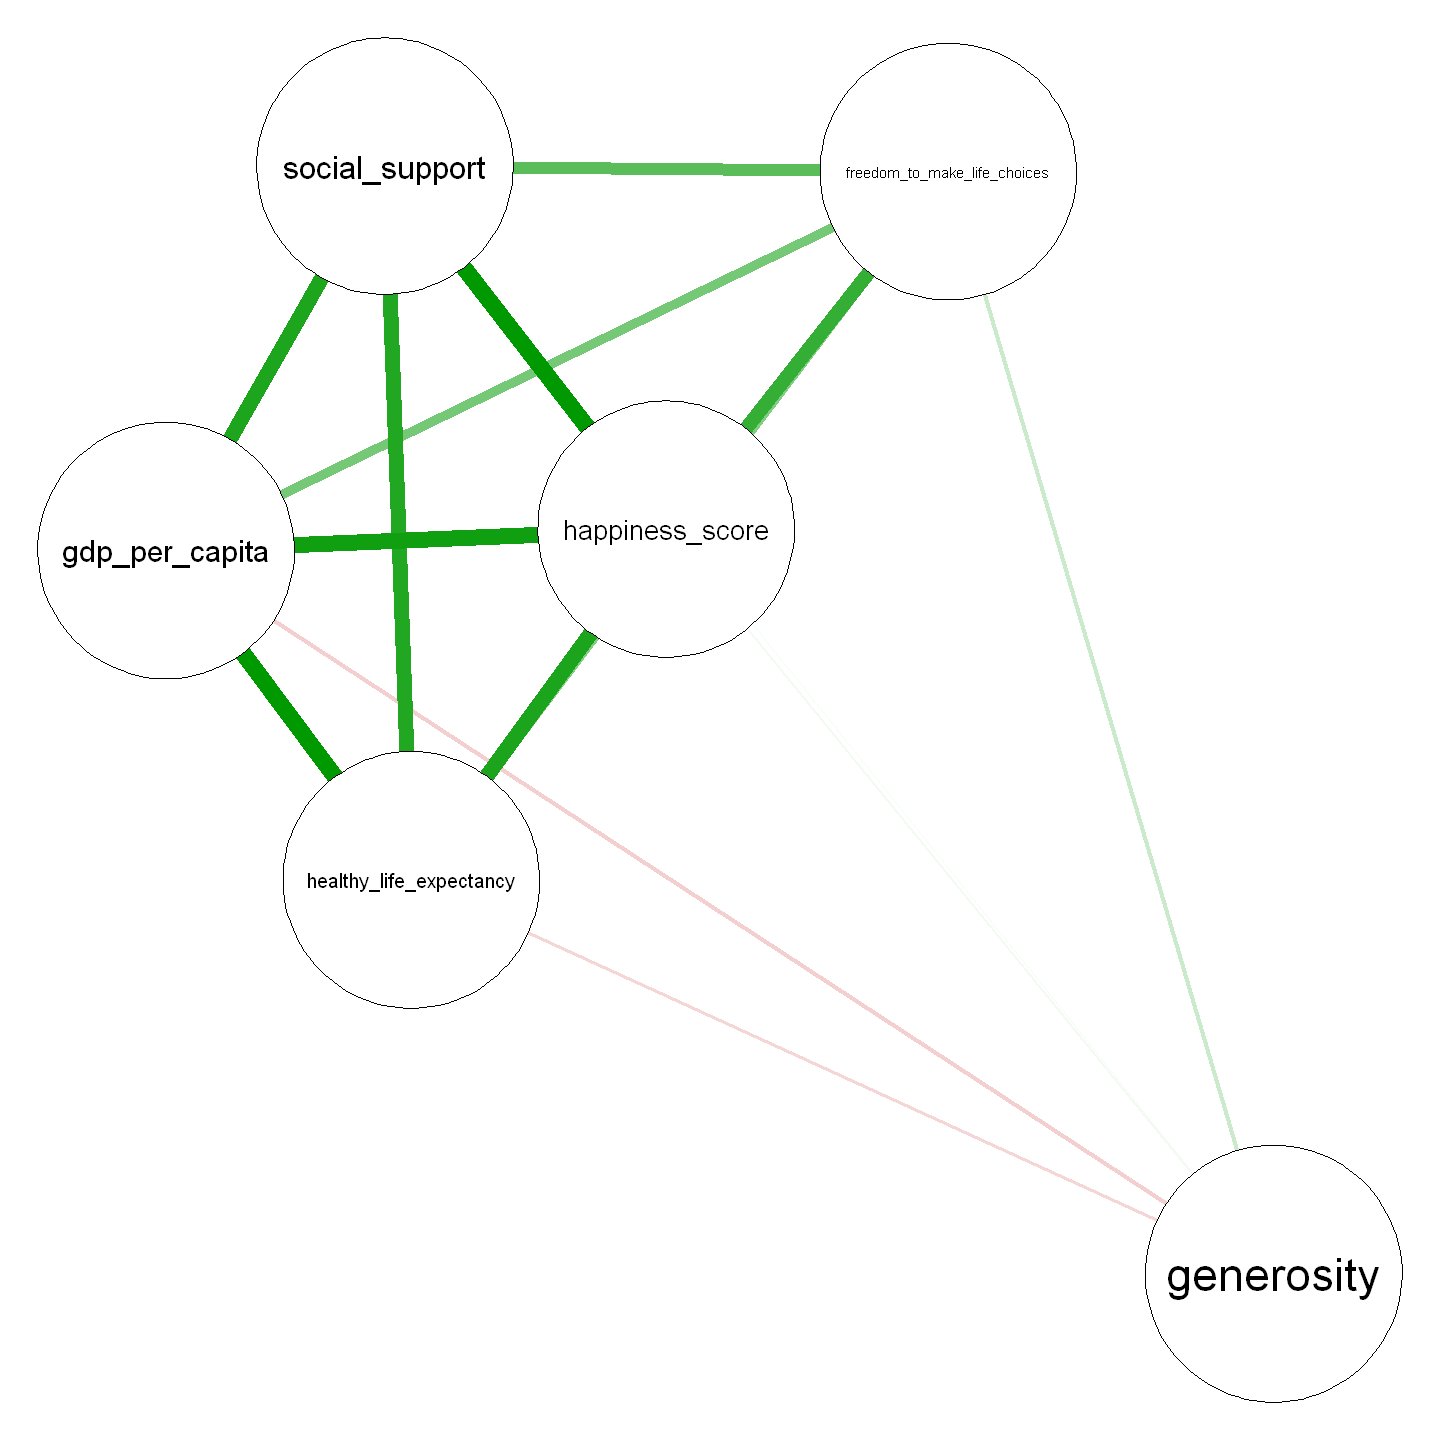

In [45]:
qgraph(cor_matrix, layout = "spring", labels = colnames(cor_matrix), label.cex = 2, node.width = 2, node.height = 2)

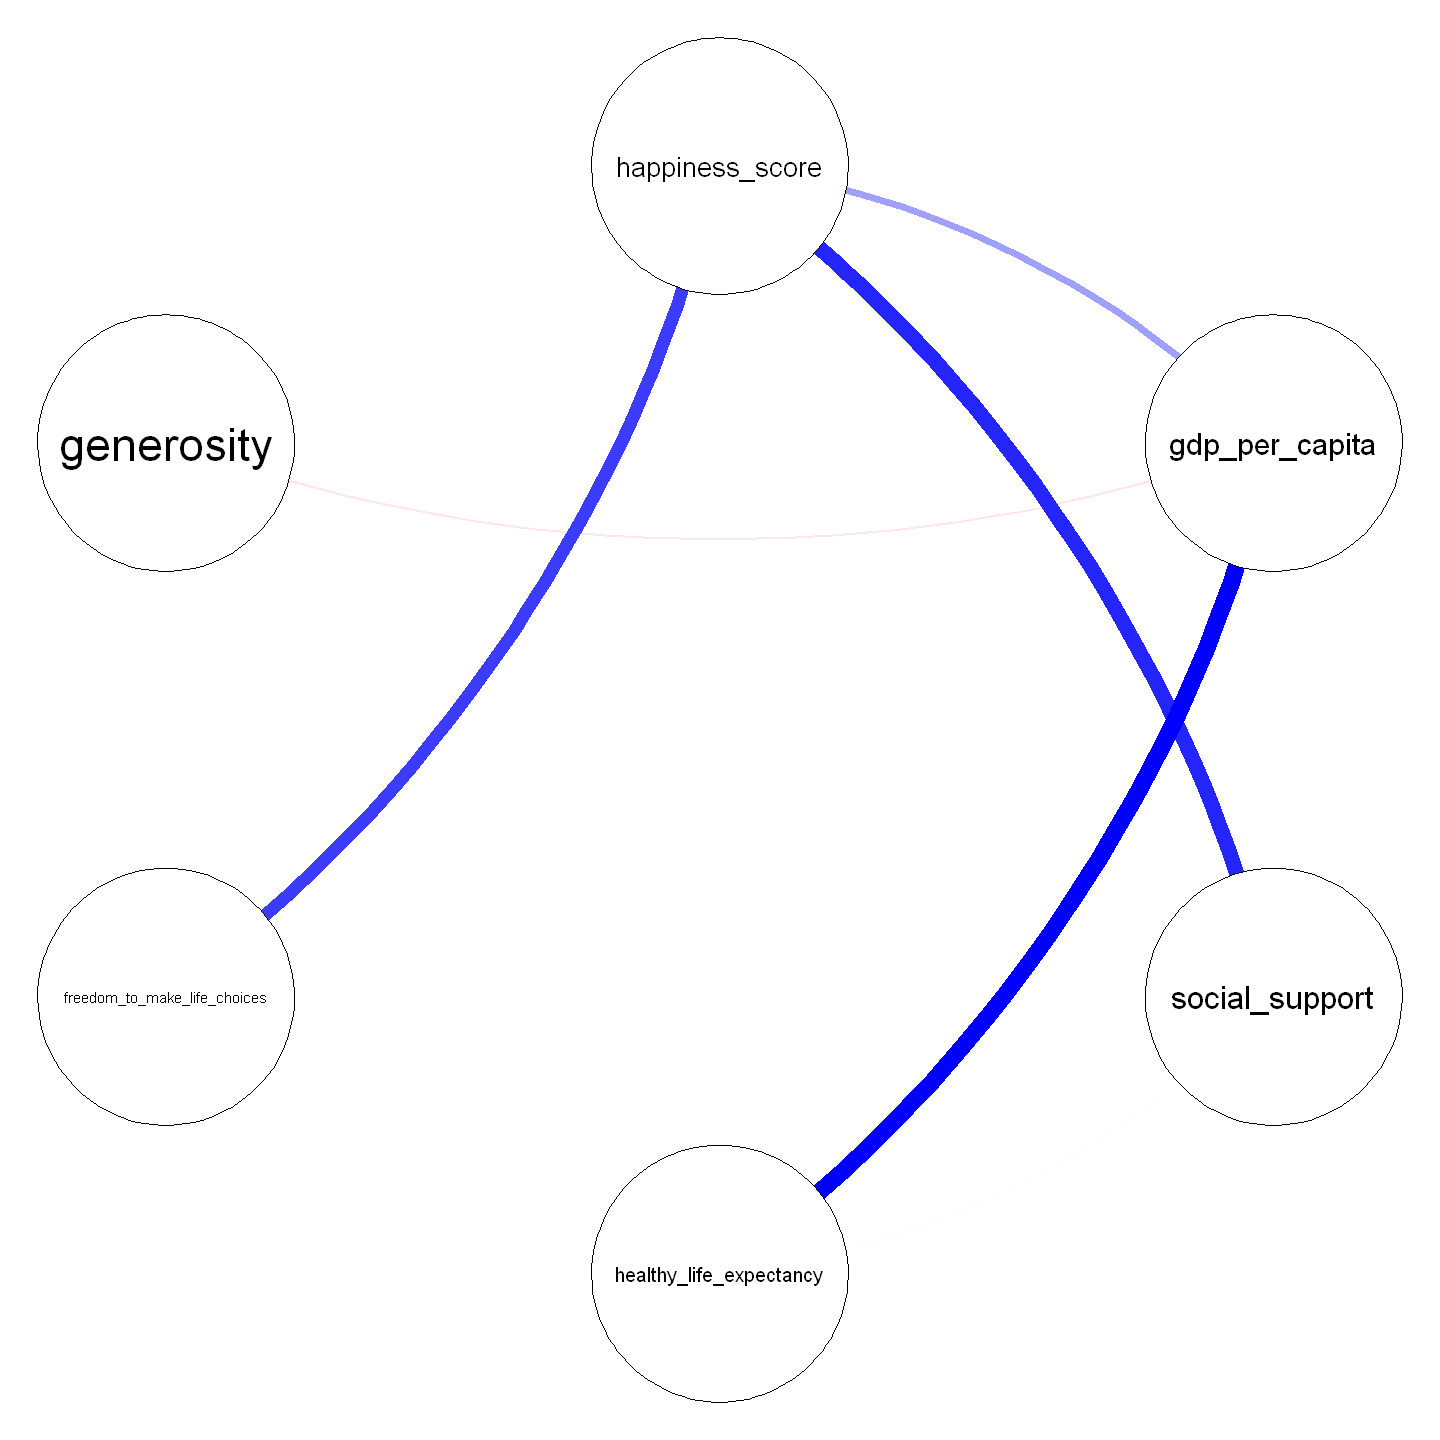

In [54]:
qgraph(cor_matrix, sampleSize = nrow(data_imputed), graph = "pcor", minimum="sig", posCol="blue",negCol="red", curveAll=T, labels = colnames(cor_matrix),
      label.cex = 2, node.width = 2, node.height = 2)

## 3.4 Статистична перевірка значущості коефіцієнтів кореляці

In [85]:
cor.test(data_imputed[,"happiness_score"], data_imputed[,"gdp_per_capita"], meathod = "pearson")


	Pearson's product-moment correlation

data:  data_imputed[, "happiness_score"] and data_imputed[, "gdp_per_capita"]
t = 14.691, df = 135, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7100283 0.8413775
sample estimates:
      cor 
0.7843422 


In [86]:
cor.test(data_imputed[,"happiness_score"], data_imputed[,"gdp_per_capita"], method = "kendal")


	Kendall's rank correlation tau

data:  data_imputed[, "happiness_score"] and data_imputed[, "gdp_per_capita"]
z = 11.372, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.6562148 


In [88]:
model <- lm(happiness_score ~ gdp_per_capita+healthy_life_expectancy+social_support, data = data_imputed)
summary(model)


Call:
lm(formula = happiness_score ~ gdp_per_capita + healthy_life_expectancy + 
    social_support, data = data_imputed)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.90603 -0.31160 -0.01129  0.39569  1.20304 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.9797     0.1925  10.285  < 2e-16 ***
gdp_per_capita            0.7870     0.2168   3.630 0.000403 ***
healthy_life_expectancy   0.7820     0.5889   1.328 0.186478    
social_support            1.8737     0.2289   8.187 1.92e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5623 on 133 degrees of freedom
Multiple R-squared:  0.762,	Adjusted R-squared:  0.7566 
F-statistic: 141.9 on 3 and 133 DF,  p-value: < 2.2e-16


In [90]:
rsquare(model, data = data_imputed)

[1] 0.7620039

## Висновки

Результати лінійної регресійної моделі та аналізу кореляції між рівнем щастя та рядом показників вказують на наступне:

1. **Лінійна Регресійна Модель:**
   - Побудована лінійна регресійна модель, в якій рівень щастя ("happiness_score") моделюється за допомогою трьох змінних: ВВП на душу населення ("gdp_per_capita"), очікувана тривалість здорового життя ("healthy_life_expectancy"), та соціальна підтримка ("social_support").
   - Всі коефіцієнти моделі є статистично значущими (p-value < 0.05), що вказує на те, що ці змінні дійсно впливають на рівень щастя.
   - Значення \( R^2 \) (Multiple R-squared) становить 0.762, що означає, що приблизно 76.2% варіації у рівні щастя може бути пояснено врахуванням цих трьох змінних.

2. **Кореляційний Аналіз:**
   - Кореляція між рівнем щастя та ВВП на душу населення (\( r = 0.784 \)) є статистично значущою, підтверджуючи результати регресійної моделі.
   - Кореляційний аналіз також включав використання тесту Кендалла, який також показав значущий та позитивний зв'язок між цими двома змінними.

3. **Загальний Висновок:**
   - Отримані результати підтверджують важливість економічного розвитку (ВВП на душу населення) та соціальної підтримки у визначенні рівня щастя. Високі значення коефіцієнтів та \( R^2 \) свідчать про сильний вплив цих факторів на рівень щастя у досліджених країнах.

Ці результати можуть бути використані для подальших досліджень та розгляду питань соціально-економічного розвитку та щастя населення.